# **🩺 Breast Cancer Detection using Machine Learning**

Breast cancer is one of the most common cancers affecting women worldwide. Early detection significantly increases the chances of successful treatment and survival. In this project, we use a dataset containing features of cell nuclei from breast masses to train and evaluate machine learning models that can classify whether a tumor is **benign** or **malignant**.

**Objective**: Build and compare machine learning models to accurately detect breast cancer from diagnostic measurements.


In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [217]:
pd.set_option('display.max_columns', None)

### **🔍Data Collection and Initial Exploration**

In [218]:
df = pd.read_csv("/content/breast_cancer_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [219]:
df.shape

(569, 33)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [221]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [222]:
df.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


* **Benign (B) –** non-cancerous

* **Malignant (M) –**cancerous

In [223]:
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


### **🧹 Data Cleaning & Preprocessing**

In [224]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Dropping Unnamed and id columns as they are not needed

In [225]:
df.drop(columns=["Unnamed: 32","id"],axis=1,inplace=True)

In [226]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [227]:
df.shape

(569, 31)

Label Encoding on diagnosis column:

In [228]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])

In [229]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now M(Malignant) is converted into 1 and B(Benign) is converted into 0 for use in model training

### **📊 Exploratory Data Analysis (EDA)**

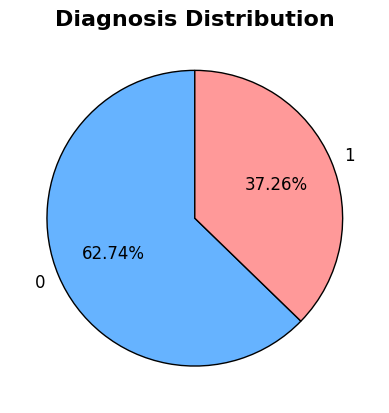

In [230]:
diagnosis = df["diagnosis"].value_counts()
colors = ['#66b3ff', '#ff9999']
plt.pie(diagnosis.values, labels=diagnosis.index,colors=colors, autopct="%1.2f%%",startangle=90,textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'black'})
plt.title("Diagnosis Distribution" ,fontsize=16, weight='bold')
plt.tight_layout
plt.show()

Balancing Data:

In [231]:
import pandas as pd

# Separate classes
majority_df = df[df["diagnosis"] == 0]
minority_df = df[df["diagnosis"] == 1]

# Count how many samples to add
n_to_duplicate = len(majority_df) - len(minority_df)

# Duplicate minority class
duplicated_minority = minority_df.sample(n=n_to_duplicate, replace=True, random_state=42)

# Combine all together
balanced_df = pd.concat([df, duplicated_minority], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(balanced_df["diagnosis"].value_counts())

diagnosis
0    357
1    357
Name: count, dtype: int64


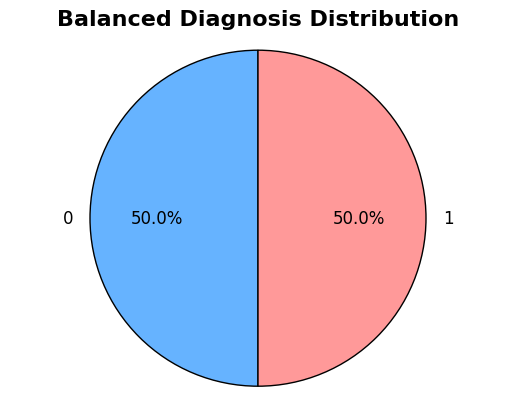

In [232]:
counts = balanced_df["diagnosis"].value_counts()
labels = counts.index
sizes = counts.values
colors = ['#66b3ff', '#ff9999']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'black'})
plt.title('Balanced Diagnosis Distribution',fontsize=16,weight="bold")
plt.axis('equal')
plt.show()

In [233]:
balanced_df["diagnosis"].value_counts()

,count
diagnosis,
0,357
1,357


 **📌 Insights:**
- Post-balancing, the dataset had an equal class distribution: **357 each**.
- Ensures fair learning and reduces model bias toward the majority class.


Feature Selection:

In [234]:
from sklearn.feature_selection import SelectKBest, f_classif

x = balanced_df.drop(columns=['diagnosis'])  # Features
y = balanced_df['diagnosis']                 # Target

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
x_new = selector.fit_transform(x, y)

# Get selected feature names
selected_features = x.columns[selector.get_support()]
print("Top 10 features:", selected_features.tolist())

Top 10 features: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


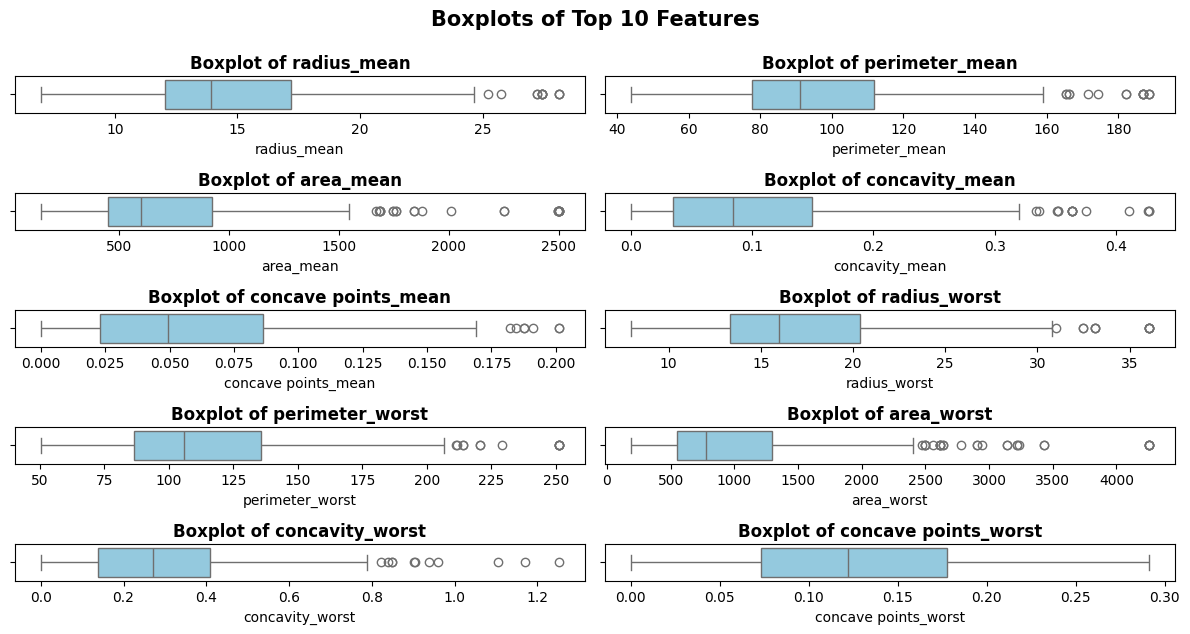

In [235]:
a=['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']
plt.figure(figsize=(12,6))
for i, col in enumerate(a,1):
  plt.subplot(5,2,i)
  sns.boxplot(data=balanced_df[col], orient='h', color='skyblue')
  plt.title(f'Boxplot of {col}',fontweight="bold")
  plt.tight_layout()
plt.suptitle("Boxplots of Top 10 Features",fontsize=15,fontweight="bold",y=1.05)
plt.show()

**📌 Insights:**
- Features like `radius_mean`, `perimeter_mean`, and `area_worst` show clear separation across classes.
- Indicates strong discriminatory power between benign and malignant tumors.
- Presence of **outliers**, especially in area-based features.


**Handling outliers:**

In [280]:
a=['area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst']
for i in a:
  q1= balanced_df[i].quantile(0.25)
  q3= balanced_df[i].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  balanced_df=balanced_df[(balanced_df[i]>=lower_bound) & (balanced_df[i]<=upper_bound)]

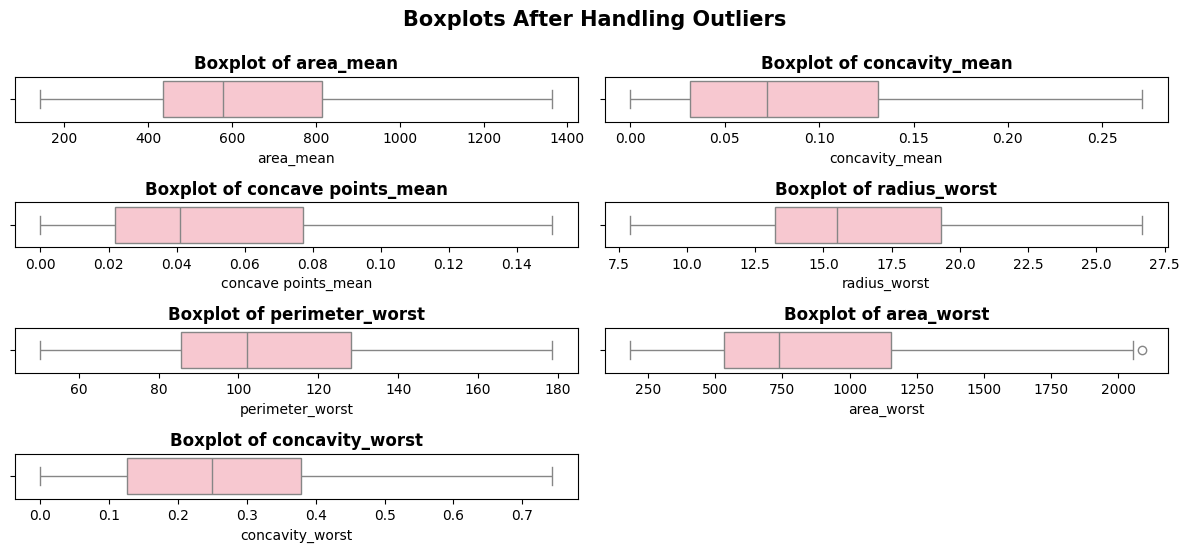

In [281]:
b=['area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst']
plt.figure(figsize=(12,6))
for i, col in enumerate(b,1):
  plt.subplot(5,2,i)
  sns.boxplot(data=balanced_df[col], orient='h', color='pink')
  plt.title(f'Boxplot of {col}',fontweight="bold")
  plt.tight_layout()
plt.suptitle("Boxplots After Handling Outliers",fontsize=15,fontweight="bold",y=1.05)
plt.show()

**📌 Insights:**
- Outliers have been successfully removed, leading to cleaner distributions.
- Helps avoid skewing of model training, especially for KNN and distance-based models.
- Class distribution slightly shifted to **355:306**, which is still acceptable.


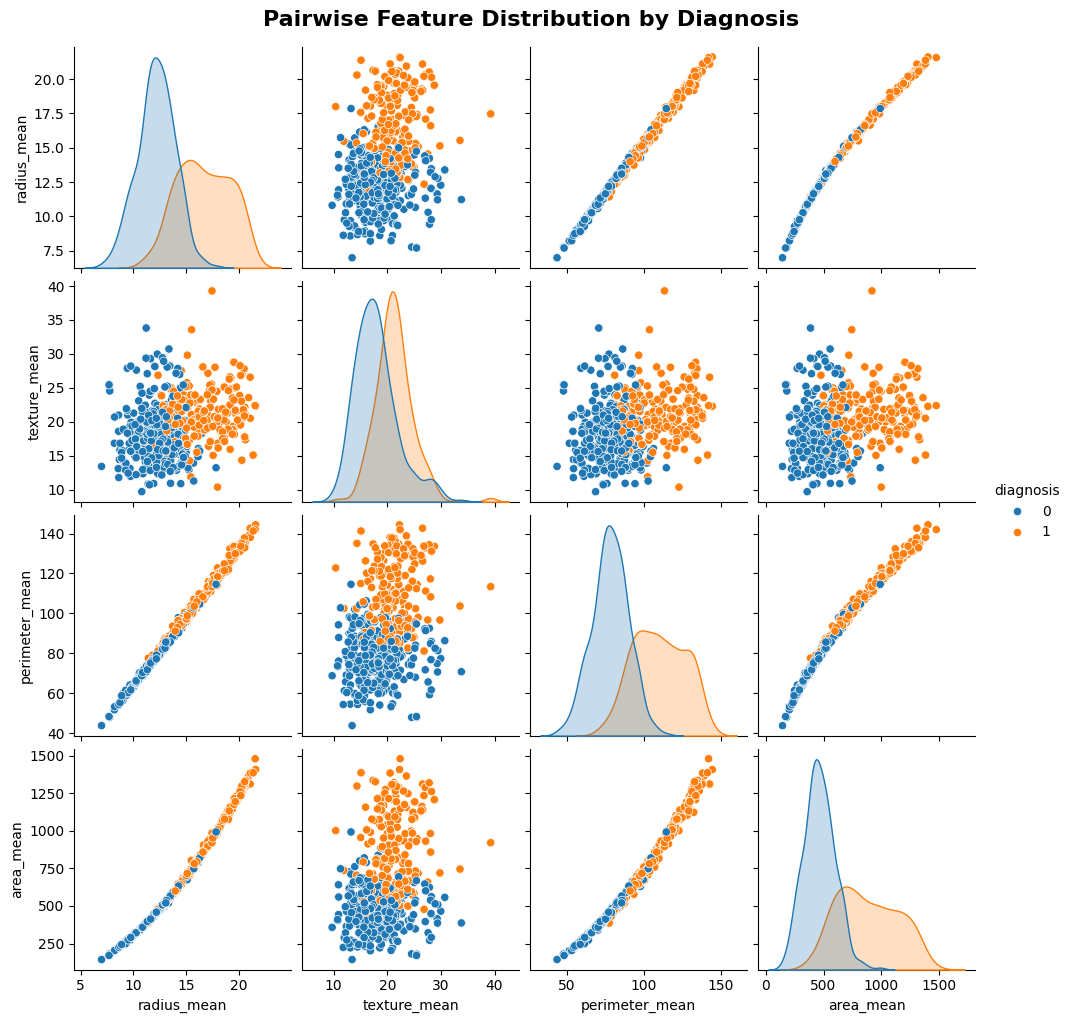

In [238]:
col = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
sns.pairplot(balanced_df[col], hue="diagnosis",height=2.5)
plt.suptitle("Pairwise Feature Distribution by Diagnosis", y=1.02, fontsize=16, weight='bold')
plt.show()

**📌 Insights:**
- Many features show visible **class clustering**, especially in radius and perimeter metrics.
- Confirms that the data is **well-suited for KNN**, which relies on distance-based neighborhood patterns.


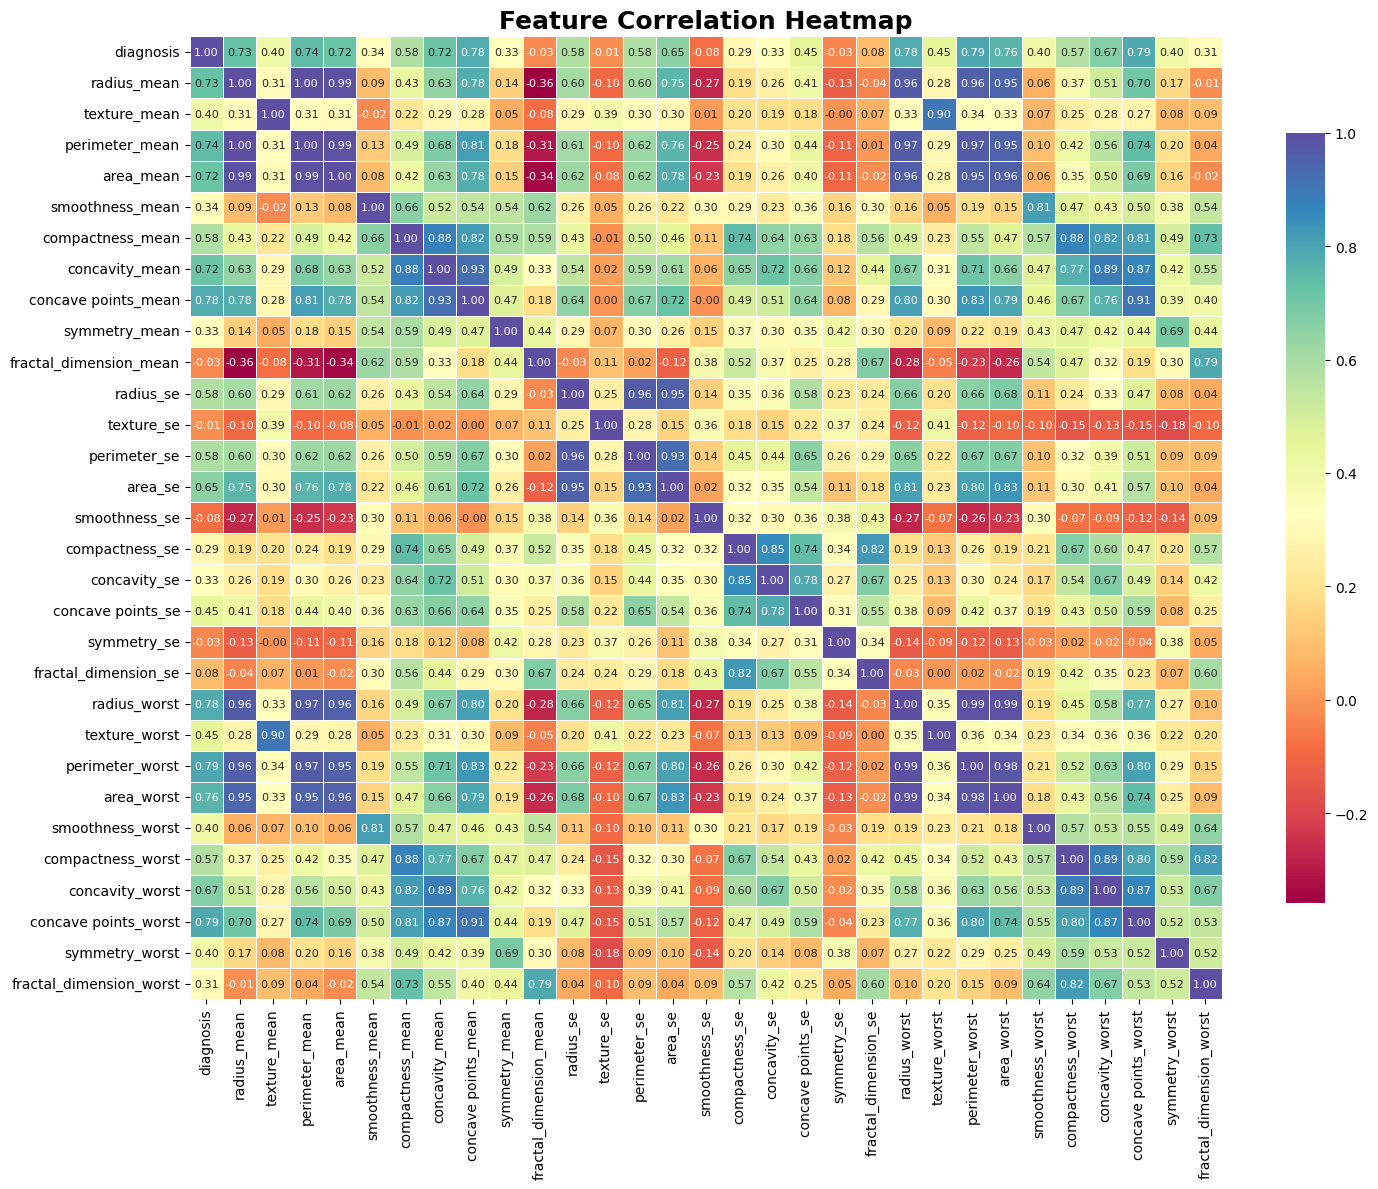

In [239]:
plt.figure(figsize=(15, 12))
sns.heatmap(balanced_df.corr(), annot=True, fmt=".2f", cmap='Spectral', linewidths=0.5,
            annot_kws={"size": 8}, cbar_kws={'shrink': 0.8})
plt.title("Feature Correlation Heatmap", fontsize=18, weight='bold')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**📌 Insights:**
- Strong correlations observed among features like `radius_mean`, `perimeter_mean`, and `area_mean`.
- Suggests **multicollinearity**, which may affect some models (like Logistic Regression).
- Helpful for selecting top features and avoiding redundant ones.


### **🖼️ Data Visualization & Insights:**

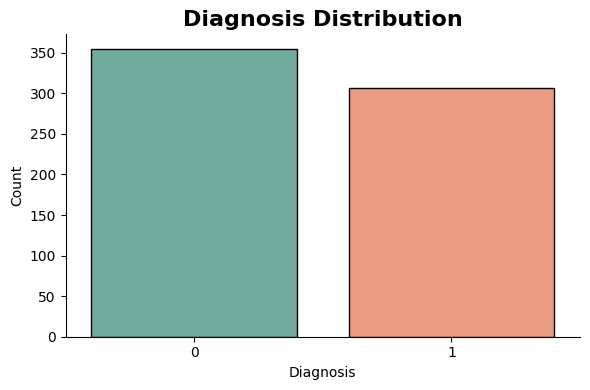

In [240]:
plt.figure(figsize=(6, 4))
sns.countplot(x="diagnosis",data=balanced_df,palette=['#69b3a2', '#fc9272'], edgecolor='black')
plt.title('Diagnosis Distribution', fontsize=16, weight='bold')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
sns.despine()
plt.tight_layout()
plt.show()

📌**Insights:**

- After outlier removal, class distribution changed to 355 (class 0) and 306 (class 1).

- The slight imbalance occurred due to more outliers in class 1 being removed.

- The current split (~54% vs. ~46%) is still reasonably balanced.

- Rebalancing again is not necessary because:

  - The imbalance is minor.

  - Oversampling may cause overfitting in KNN, which is sensitive to duplicate data.

- The dataset is fit for training as-is without further balancing.

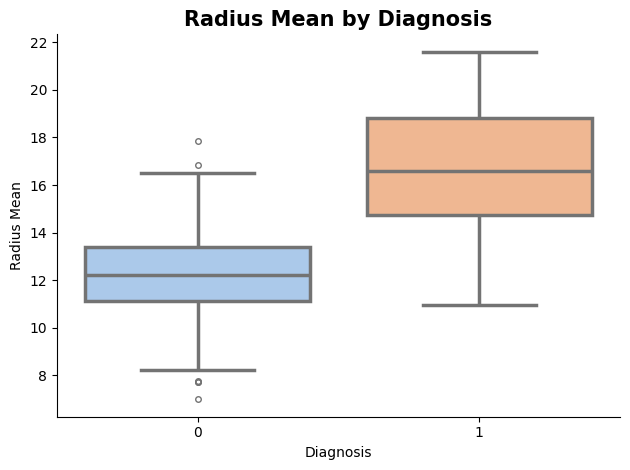

In [241]:
sns.boxplot(x='diagnosis', y='radius_mean', data=balanced_df, palette='pastel', linewidth=2.5, fliersize=4)
plt.title('Radius Mean by Diagnosis',fontsize=15, weight='bold')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
sns.despine()
plt.tight_layout()
plt.show()

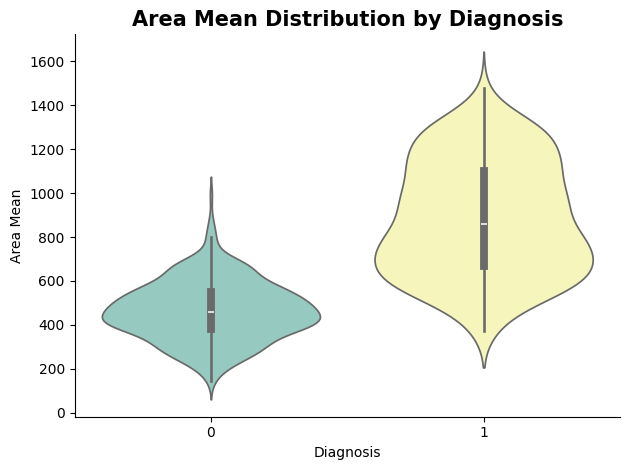

In [242]:
sns.violinplot(x='diagnosis', y='area_mean', data=balanced_df, palette='Set3')
plt.title('Area Mean Distribution by Diagnosis', fontsize=15, weight='bold')
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')
sns.despine()
plt.tight_layout()
plt.show()

**📌 Insights:**
- Malignant tumors have significantly higher area_mean values.
- This feature provides strong separation between classes.


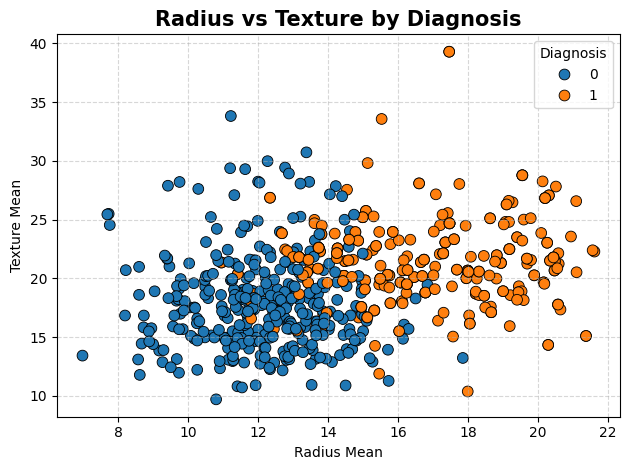

In [243]:
sns.scatterplot(data=balanced_df, x='radius_mean', y='texture_mean', hue='diagnosis', palette=['#1f77b4', '#ff7f0e'], s=60, edgecolor='black')
plt.title('Radius vs Texture by Diagnosis', fontsize=15, weight='bold')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**📌 Insights:**
- Shows that benign and malignant tumors form **distinct clusters** in this 2D feature space.
- Supports use of models like KNN that benefit from such separation.


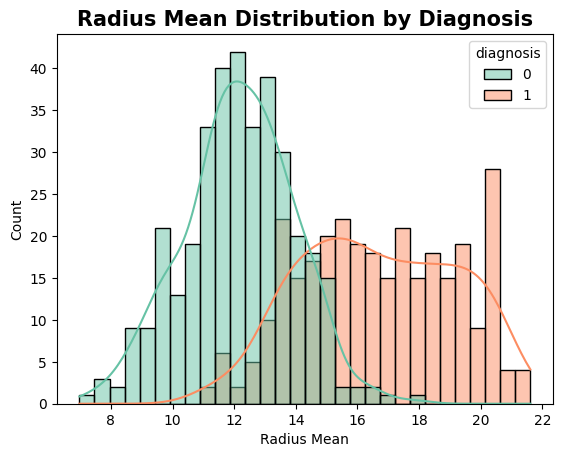

In [244]:
sns.histplot(data=balanced_df, x='radius_mean', hue='diagnosis', bins=30, kde=True, palette='Set2')
plt.title('Radius Mean Distribution by Diagnosis',fontsize=15, weight='bold')
plt.xlabel('Radius Mean')
plt.ylabel('Count')
plt.show()

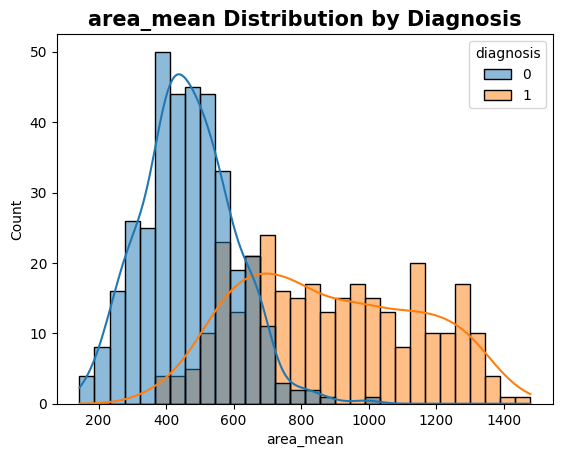

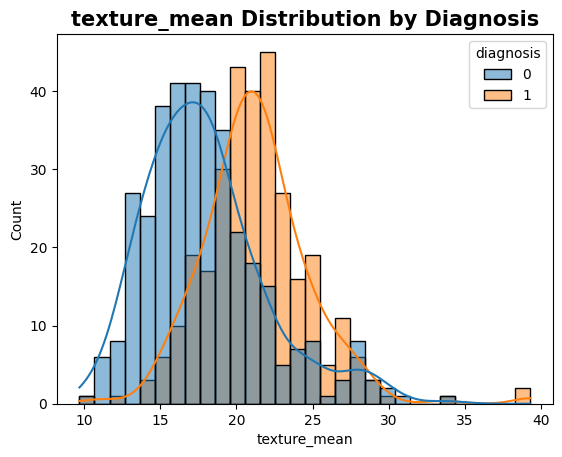

In [245]:
features = [ 'area_mean', 'texture_mean']
for feature in features:
    plt.figure()
    sns.histplot(data=balanced_df, x=feature, hue='diagnosis', kde=True, bins=30)
    plt.title(f'{feature} Distribution by Diagnosis',fontsize=15, weight='bold')
    plt.show()

**📌 Insights:**
- Distribution shapes differ between benign and malignant classes.
- Malignant tumors tend to have higher radius and area metrics.
- These features contribute well to classification decisions.


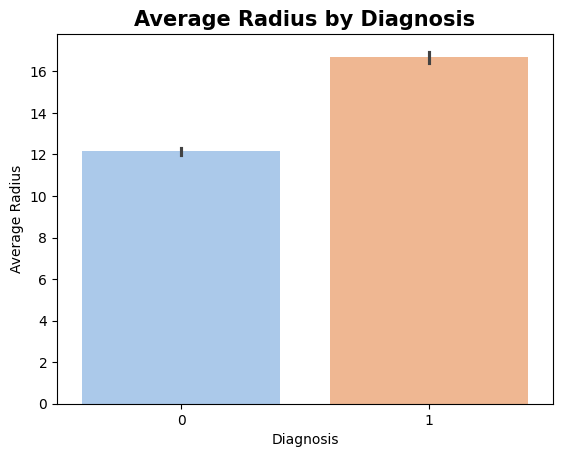

In [246]:
sns.barplot(x='diagnosis', y='radius_mean', data=balanced_df, palette='pastel')
plt.title('Average Radius by Diagnosis',fontsize=15, weight='bold')
plt.xlabel('Diagnosis')
plt.ylabel('Average Radius')
plt.show()

**📌 Insights:**
- Malignant tumors have a higher average radius compared to benign.
- Confirms earlier insights from boxplots and histograms.


### **🔧Feature Scaling:**

In [247]:
x=balanced_df[['perimeter_mean', 'concave points_mean','radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']] #features
y=balanced_df["diagnosis"] #target variable

In [248]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [249]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain_scaled=sc.fit_transform(xtrain)
xtest_scaled=sc.transform(xtest)

### **🤖Model Fitting & Selection:**

### 1. Logistic Regression

In [250]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(xtrain_scaled,ytrain)

LogisticRegression(random_state=0)

In [251]:
ypred = lr.predict(xtest_scaled)

In [252]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
print("MODEL: LOGISTIC REGRESSION\n")
print("ACCURACY SCORE:",accuracy_score(ytest,ypred))
print("\nCONFUSION MATRIX: \n",confusion_matrix(ytest,ypred))
print("\nCLASSIFICATION REPORT: \n",classification_report(ytest,ypred))
print("\nF1 SCORE: \n",f1_score(ytest,ypred))

MODEL: LOGISTIC REGRESSION

ACCURACY SCORE: 0.9699248120300752

CONFUSION MATRIX: 
 [[68  1]
 [ 3 61]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.98      0.95      0.97        64

    accuracy                           0.97       133
   macro avg       0.97      0.97      0.97       133
weighted avg       0.97      0.97      0.97       133


F1 SCORE: 
 0.9682539682539683


In [253]:
# Training prediction
ytrain_pred = lr.predict(xtrain_scaled)

# Accuracy scores
train_acc = accuracy_score(ytrain, ytrain_pred)
test_acc = accuracy_score(ytest, ypred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 0.93
Test Accuracy: 0.97


Model has done overfitting. To remove it, we will use cross validation:-

In [254]:
from sklearn.model_selection import KFold

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [255]:
from sklearn.model_selection import cross_val_score
cross_val_results = cross_val_score(lr, xtrain_scaled, ytrain, cv=kf)

In [256]:
print("Cross-Validation Results (Accuracy):")
for i, result in enumerate(cross_val_results, 1):
    print(f"  Fold {i}: {result * 100:.2f}%")

print(f'Mean Accuracy: {cross_val_results.mean()* 100:.2f}%')

Cross-Validation Results (Accuracy):
  Fold 1: 91.51%
  Fold 2: 95.28%
  Fold 3: 94.34%
  Fold 4: 94.29%
  Fold 5: 92.38%
Mean Accuracy: 93.56%


Now checking training and test accuracy again:

In [257]:
train_acc = accuracy_score(ytrain, ytrain_pred)
test_acc = accuracy_score(ytest, ypred)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 0.93
Test Accuracy: 0.97


**📌 Insights: Logistic Regression**

- Achieved **96.9% accuracy** on the test set.
- Slight overfitting observed (Train Acc: 93%, Test Acc: 97%).
- Confusion matrix showed **few false negatives** (missed malignant cases).
- Balanced precision and recall for both classes.
- Good general baseline model, but might not capture non-linear relationships in the data.


### 2. SVM

In [258]:
from sklearn.svm import SVC
svm=SVC(kernel="linear",random_state=0)
svm.fit(xtrain_scaled,ytrain)

SVC(kernel='linear', random_state=0)

In [259]:
ypred_svc = svm.predict(xtest_scaled)

In [260]:
print("MODEL: SVC\n")
print("ACCURACY SCORE:",accuracy_score(ytest,ypred_svc))
print("\nCONFUSION MATRIX: \n",confusion_matrix(ytest,ypred_svc))
print("\nCLASSIFICATION REPORT: \n",classification_report(ytest,ypred_svc))
print("\nF1 SCORE: \n",f1_score(ytest,ypred_svc))

MODEL: SVC

ACCURACY SCORE: 0.9699248120300752

CONFUSION MATRIX: 
 [[68  1]
 [ 3 61]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.98      0.95      0.97        64

    accuracy                           0.97       133
   macro avg       0.97      0.97      0.97       133
weighted avg       0.97      0.97      0.97       133


F1 SCORE: 
 0.9682539682539683


In [261]:
# Training prediction
ytrain_pred = svm.predict(xtrain_scaled)

# Accuracy scores
train_acc = accuracy_score(ytrain, ytrain_pred)
test_acc = accuracy_score(ytest, ypred_svc)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 0.94
Test Accuracy: 0.97


**📌 Insights: Support Vector Machine (SVM)**

- Also achieved **96.9% test accuracy**, similar to Logistic Regression.
- Slight improvement in training accuracy (94%) indicates better fit.
- Maintains **high precision and recall**, especially for malignant class.
- More robust than Logistic Regression for handling margins.
- Suitable for small-to-medium datasets with clean separation between classes.


### 3. Random Forest

In [262]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion="entropy")
rf.fit(xtrain_scaled,ytrain)

RandomForestClassifier(criterion='entropy')

In [263]:
ypred_rf = rf.predict(xtest_scaled)

In [264]:
print("MODEL: RANDOM FOREST\n")
print("ACCURACY SCORE:",accuracy_score(ytest,ypred_rf))
print("\nCONFUSION MATRIX: \n",confusion_matrix(ytest,ypred_rf))
print("\nCLASSIFICATION REPORT: \n",classification_report(ytest,ypred_rf))
print("\nF1 SCORE: \n",f1_score(ytest,ypred_rf))

MODEL: RANDOM FOREST

ACCURACY SCORE: 0.9774436090225563

CONFUSION MATRIX: 
 [[69  0]
 [ 3 61]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.95      0.98        64

    accuracy                           0.98       133
   macro avg       0.98      0.98      0.98       133
weighted avg       0.98      0.98      0.98       133


F1 SCORE: 
 0.976


In [265]:
# Training prediction
ytrain_pred = rf.predict(xtrain_scaled)

# Accuracy scores
train_acc = accuracy_score(ytrain, ytrain_pred)
test_acc = accuracy_score(ytest, ypred_rf)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.98


 **📌 Insights: Random Forest**

- Highest test accuracy so far: **98%**.
- **Perfect prediction for benign class** in test set (0 false positives).
- Some **overfitting** present (Train Acc: 100%, Test Acc: 97%).
- High interpretability through feature importance scores.
- Great performance but may not generalize as well without proper tuning.


### 4. XG BOOST

In [266]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42,use_label_encoder=False)
xgb_clf.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [267]:
ypred_xgb = xgb_clf.predict(xtest)

In [268]:
print("MODEL: XG BOOST\n")
print("ACCURACY SCORE:",accuracy_score(ytest,ypred_xgb))
print("\nCONFUSION MATRIX: \n",confusion_matrix(ytest,ypred_xgb))
print("\nCLASSIFICATION REPORT: \n",classification_report(ytest,ypred_xgb))
print("\nF1 SCORE: \n",f1_score(ytest,ypred_xgb))

MODEL: XG BOOST

ACCURACY SCORE: 0.9624060150375939

CONFUSION MATRIX: 
 [[69  0]
 [ 5 59]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        69
           1       1.00      0.92      0.96        64

    accuracy                           0.96       133
   macro avg       0.97      0.96      0.96       133
weighted avg       0.96      0.96      0.96       133


F1 SCORE: 
 0.959349593495935


In [269]:
# Training prediction
ytrain_pred = xgb_clf.predict(xtrain_scaled)

# Accuracy scores
train_acc = accuracy_score(ytrain, ytrain_pred)
test_acc = accuracy_score(ytest, ypred_xgb)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 0.90
Test Accuracy: 0.96


**📌 Insights: XGBoost**

- Test accuracy: **96.2%** — slightly lower than Random Forest.
- Recall for malignant class slightly lower, suggesting a few false negatives.
- Strong performance despite being trained on **unscaled features**.
- Efficient and powerful, but requires **careful tuning** to avoid overfitting or underfitting.
- More computationally intensive than simpler models like KNN.


### 5. KNN

In [270]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knn.fit(xtrain_scaled,ytrain)

KNeighborsClassifier()

In [271]:
ypred_knn = knn.predict(xtest_scaled)

In [272]:
print("MODEL: KNN\n")
print("ACCURACY SCORE:",accuracy_score(ytest,ypred_knn))
print("\nCONFUSION MATRIX: \n",confusion_matrix(ytest,ypred_knn))
print("\nCLASSIFICATION REPORT: \n",classification_report(ytest,ypred_knn))
print("\nF1 SCORE: \n",f1_score(ytest,ypred_knn))

MODEL: KNN

ACCURACY SCORE: 0.9624060150375939

CONFUSION MATRIX: 
 [[68  1]
 [ 4 60]]

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        69
           1       0.98      0.94      0.96        64

    accuracy                           0.96       133
   macro avg       0.96      0.96      0.96       133
weighted avg       0.96      0.96      0.96       133


F1 SCORE: 
 0.96


In [273]:
# Training prediction
ytrain_pred = knn.predict(xtrain_scaled)

# Accuracy scores
train_acc = accuracy_score(ytrain, ytrain_pred)
test_acc = accuracy_score(ytest, ypred_knn)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

Training Accuracy: 0.96
Test Accuracy: 0.96


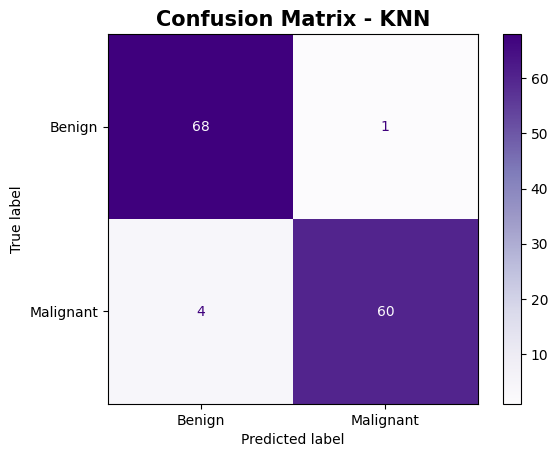

In [283]:
cm = confusion_matrix(ytest, ypred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - KNN",fontsize=15, weight='bold')
plt.show()

**📌 Insights: K-Nearest Neighbors (KNN)**

- Test and training accuracy both at **96.2%** — indicates **no overfitting**.
- Confusion matrix shows very few misclassifications.
- Equal precision and recall for both classes — a **balanced classifier**.
- Simple, effective model with no training phase — works well with well-preprocessed data.
- Slightly slower during prediction, and performance depends on good scaling and feature selection.


---

### 🤖 **Model Fitting: Why Not All Models Work Perfectly**

- While KNN gave good results, it's important to note its **limitations**:
  - It is a **lazy learner**, meaning it stores the entire training set and classifies based on distance — this can be **slow** on large datasets.
  - KNN is **sensitive to irrelevant or redundant features**.
  - It requires **feature scaling**, as it relies on Euclidean distances.

### ✅ Strength of KNN:
- Despite its limitations, KNN performed **exceptionally well here**, with **equal training and test accuracy (96%)**, showing that:
  - The features selected are informative.
  - The model is generalizing well without overfitting.


---

### **📈 Model Evaluation & Comparison:**

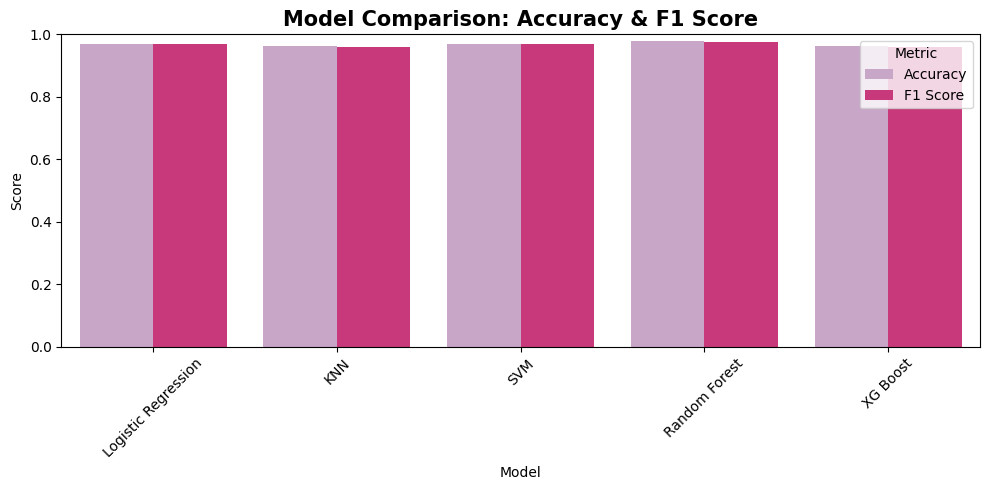

In [286]:
# Store the evaluation metrics in a DataFrame
results = {
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'XG Boost'],
    'Accuracy': [accuracy_score(ytest, ypred), accuracy_score(ytest, ypred_knn), accuracy_score(ytest, ypred_svc), accuracy_score(ytest, ypred_rf), accuracy_score(ytest, ypred_xgb)],
    'F1 Score': [f1_score(ytest, ypred), f1_score(ytest, ypred_knn), f1_score(ytest, ypred_svc), f1_score(ytest, ypred_rf), f1_score(ytest, ypred_xgb)]
}
df_results = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
df_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric',palette="PuRd")
plt.title('Model Comparison: Accuracy & F1 Score',fontsize=15,fontweight="bold")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

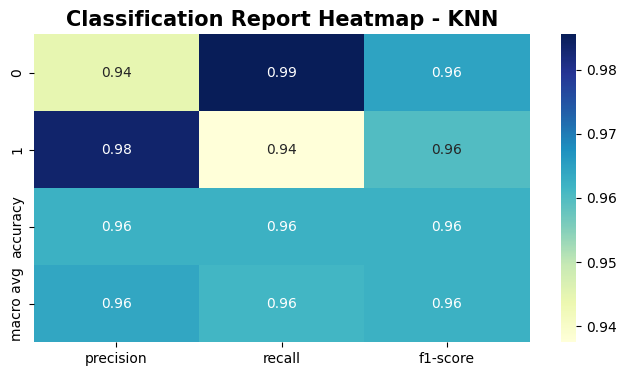

In [285]:
#Classification report for KNN
report = classification_report(ytest, ypred_knn, output_dict=True)
df_report = pd.DataFrame(report).transpose().iloc[:-1, :-1]  # Exclude 'accuracy' row

plt.figure(figsize=(8, 4))
sns.heatmap(df_report, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Classification Report Heatmap - KNN",fontsize=15,fontweight="bold")
plt.show()


In [276]:
models = {
    'Logistic Regression': lr,
    'KNN': knn,
    'SVM': svm,
    'Random Forest': rf,
    'XGBoost': xgb_clf
}

results = []
for name, model in models.items():
    # XGBoost was trained on unscaled xtest, others on xtest_scaled
    X_eval = xtest if name == 'XGBoost' else xtest_scaled
    y_pred = model.predict(X_eval)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(ytest, y_pred),
        'F1 Score':  f1_score    (ytest, y_pred)
    })

df_results = pd.DataFrame(results).round(4)
print(df_results)

                 Model  Accuracy  F1 Score
0  Logistic Regression    0.9699    0.9683
1                  KNN    0.9624    0.9600
2                  SVM    0.9699    0.9683
3        Random Forest    0.9774    0.9760
4              XGBoost    0.9624    0.9593


**📈 Model Evaluation: Insights**

- KNN achieved an **accuracy of 96.2%** with **balanced F1-scores** for both classes.
- Confusion matrix shows only a few misclassifications, confirming high sensitivity.
- Unlike models like XGBoost or Random Forest that risk overfitting due to complexity, KNN maintained **consistent performance** on both train and test sets.
- The **equal train-test accuracy** (96%) is a strong sign of reliability and generalization.


---

### **🩺 Real-Time Prediction Using KNN**

Enter the required feature values below to classify the tumor as Benign or Malignant using the trained KNN model.

In [277]:
balanced_df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,0.1408,0.4607,1.103,10.50,0.006040,0.01529,0.015140,0.006460,0.01344,0.002206,12.82,15.97,83.74,510.5,0.1548,0.23900,0.21020,0.08958,0.3016,0.08523
1,1,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,0.1869,0.06532,0.5706,1.4570,2.961,57.72,0.010560,0.03756,0.058390,0.011860,0.04022,0.006187,17.73,25.21,113.70,975.2,0.1426,0.21160,0.33440,0.10470,0.2736,0.07953
2,1,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,0.2130,0.5914,1.545,18.52,0.005367,0.02239,0.030490,0.012620,0.01377,0.003187,15.53,26.02,107.30,740.4,0.1610,0.42250,0.50300,0.22580,0.2807,0.10710
3,0,12.72,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.01924,0.1638,0.06100,0.1807,0.6931,1.340,13.38,0.006064,0.01180,0.006564,0.007978,0.01374,0.001392,13.50,17.48,88.54,553.7,0.1298,0.14720,0.05233,0.06343,0.2369,0.06922
4,1,11.76,18.14,75.00,431.1,0.09968,0.05914,0.02685,0.03515,0.1619,0.06287,0.6450,2.1050,4.138,49.11,0.005596,0.01005,0.012720,0.014320,0.01575,0.002758,13.36,23.39,85.10,553.6,0.1137,0.07974,0.06120,0.07160,0.1978,0.06915


In [287]:
# List of features
feature_names = ['perimeter_mean', 'concave points_mean','radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']

# Function to take input and predict
def predict_cancer():
    print("Enter the following values:")
    input_data = []

    for feature in feature_names:
        value = float(input(f"{feature}: "))
        input_data.append(value)

    # Convert input to 2D array for prediction
    input_array = np.array([input_data])

    # Scale input since we used a scaler during training
    input_scaled = sc.transform(input_array)

    # Make prediction
    prediction = knn.predict(input_scaled)

    # Display result
    if prediction[0] == 0:
        print("\n🟢 Prediction: **Benign Tumor**")
    else:
        print("\n🔴 Prediction: **Malignant Tumor**")

# Call the function
predict_cancer()


Enter the following values:
perimeter_mean: 107.50
concave points_mean: 0.07981
radius_worst: 17.73
perimeter_worst: 113.70
area_worst: 975.2
concave points_worst: 0.10470

🔴 Prediction: **Malignant Tumor**


Took input from the 2nd row of balanced_df and results were accurate.

---

## **🏁 Final Conclusion**

- ✅ In this project, we successfully built a machine learning pipeline to detect whether a breast tumor is **Benign (non-cancerous)** or **Malignant (cancerous)**.
- 📊 After data cleaning, balancing, and outlier removal, we selected the most relevant features and evaluated multiple models.
- 💡 Among all, **K-Nearest Neighbors (KNN)** delivered **consistent performance** with **equal training and testing accuracy (96%)**, making it a reliable and interpretable choice.
- ⚖️ Unlike more complex models (Random Forest, XGBoost), KNN avoided overfitting while still achieving high recall and F1-score.

---

### 📌 Key Takeaways:
- ✔️ Proper **data preprocessing** (balancing, scaling, feature selection) is critical to model performance.
- ✔️ Even simple models like **KNN** can outperform complex ones when the dataset is clean and well-structured.
- ✔️ This project can act as a **foundation** for more advanced models, real-time prediction tools, or medical diagnostic apps.

---

🔬 **Impact**:  
This model, when deployed, can assist healthcare professionals in **early detection** of breast cancer — improving patient outcomes and aiding clinical decision-making.

